The Recommendation system, here designed below is based on 
the journey of a new customer from the time first he/she 
lands on the business's website for the first time to when he/she makes repeat purchases.

The recommendation system with three part on the business context.

**Recommendation System Part - I** : Product popularity based system targetted on new customers.

**Recommendation System Part - II** : Model-based collaborative filtering system based on custome's purchase
history and rating provided by other users who bought items 
similar items.

**Recommendation System part - III** : When a business is setting up its e-cmmerce website for the first time without any product rating.

When a new customer without any previous purchase history 
visits the e-commmerce website for the first time, he/she 
is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the 
recommendation system updates and recommends other products based on the purchase history and rating provided
by other users on the website. The latter part is done using collaborative filtering techniques.

### **Recommendation System Part - I**

Popularity Based are a great strategy to target the new 
customers with the most popular products sold on a 
business's website and is very useful to sold 
start a recommendation engine.


In [69]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'product-recommendation-system-for-e-commerce 1.ipynb', 'product_descriptions.csv', 'ratings_Beauty.csv']


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
amazon_ratings = pd.read_csv('ratings_Beauty.csv')
amazon_ratings.head(2)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200


In [72]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [73]:
amazon_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [74]:
print(amazon_ratings.shape)

(2023070, 4)


In [75]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
popular_products.head(20)

,Rating
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1
1304139212,1
1304139220,1
130414089X,1
130414643X,3


In [76]:
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(20)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


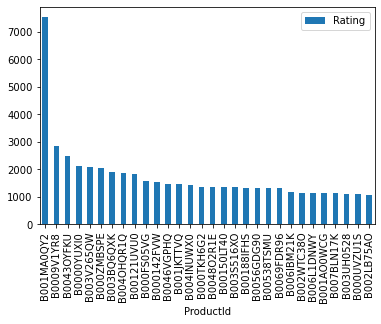

In [77]:
most_popular.head(30).plot(kind='bar')
plt.show()

The above graph gives the most popular products
(arranged in descending order) sold by the business.

For example, product ID #B001MA0QY2 has sales of over 7000
and the next most popular product ID #B0009V1YR8 has sales 
of 3000, etc.

### **Recommendation System Part - II**

#### **Model-based collaborative filtering system**

Recommendation items to users based on purchase history
and ratings provided by other users who bought items to
that of a particular customer.

A model based collaborative filtering technique is closen 
here as it helps in making predecting products for a particular user by identifying patterns based on preferences from multiple user data.

#### **Utility matrix based on products sold and user reviews**

**Utility Matrix** : An utility matrix is consists of all
possible user-item preferences(rating) details represented
as a matrix. The utility matrix is sprace as none of the users would buy all the items in the list, hence, most of the values are unknown.


In [78]:
amazon_ratings_1 = amazon_ratings.head(10000)

In [79]:
amazon_ratings_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserId     10000 non-null  object 
 1   ProductId  10000 non-null  object 
 2   Rating     10000 non-null  float64
 3   Timestamp  10000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [80]:
rating_utility_matrix = amazon_ratings_1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
rating_utility_matrix.head(3)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the above, utility matrix is sparce, I have filled up
the unknown values with 0 

In [81]:
print(rating_utility_matrix.shape)

(9697, 886)


Taking Transposing the matrix

In [82]:
X = rating_utility_matrix.T
X.head(3)

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
print(X.shape)

(886, 9697)


Unique products in subset of data

In [84]:
X1 = X

#### Decomposing the Metrix

In [85]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [86]:
svd = TruncatedSVD(n_components=10)
decomposed_matrix = svd.fit_transform(X)
print(decomposed_matrix.shape)

(886, 10)


#### Correlation Matrix

In [87]:
correlation_matrix = np.corrcoef(decomposed_matrix)
print(correlation_matrix.shape)

(886, 886)


### Isolating Product ID #6117036094 from the correlation matrix

Assuming the customer buys Products ID #6117036094 (randomly chosen)

In [88]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [89]:
i = "6117036094"

product_names = list(X.index)
product_ID  = product_names.index(i)
print(product_ID)

99


correlation for all items with the item purchased by this 
customer based on items rated by other customers people 
who bought the same product

In [90]:
correlation_product_ID = correlation_matrix[product_ID]
print(correlation_product_ID.shape)

(886,)


#### Recommending top 10 highly correlated products in sequence

In [91]:
recommend = list(X.index[correlation_product_ID > 0.90])

# Remove the item already bought by the customer
recommend.remove(i)

recommend[:9]

['1304482596',
 '1304495396',
 '535795545X',
 '602260074X',
 '6022600812',
 '6162071103',
 '6175005589',
 '9509369934',
 '951311290X']

Here are the top 10 products to be displayed by the 
recommendation system to the above customer based on the 
purchase history of other customers in the website.

### **Recommendation System Part - III**

For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description. 

**Item-to-Item based recommendation system based on product description**

Applicable when business is setting up its E-Commerce website for the first time

In [92]:
product_descriptions = pd.read_csv("product_descriptions.csv")
product_descriptions.head(2)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...


In [93]:
product_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_uid          124428 non-null  int64 
 1   product_description  124428 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [94]:
product_descriptions.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [95]:
print(product_descriptions.shape)

(124428, 2)


**Feature extraction from product descriptions**

Converting the text in product description into numerical data for analysis

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [97]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions['product_description'])
print(X1.shape)

(124428, 268559)


**Visualizing product clusters in subsets of data**

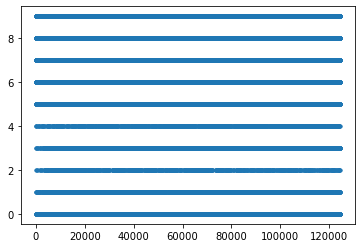

In [98]:
# Finding K-Means to the dataset

X = X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

# Output

Recommendation of product based on the current product selected by user.

To recommend related product based on, Frequently bought together.

**Top words in each cluster based on product description**

In [99]:
def print_cluster(i,order_centroids,terms,true_k):
    print("Cluster %d:" % (int(i)+1))
    for idk in order_centroids[i, :true_k]:
        print(" %s" % terms[idk])
    print()

In [100]:
# Optimal Cluster is

true_k=10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter = 100, n_init=1)
model.fit(X1)

print('Top terms per cluster: ')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i,order_centroids,terms,true_k)

Top terms per cluster: 
Cluster 1:
 easy
 use
 ft
 steel
 home
 wood
 design
 used
 water
 installation

Cluster 2:
 cutting
 blade
 steel
 head
 tool
 screws
 drive
 bit
 metal
 drill

Cluster 3:
 door
 doors
 glass
 panel
 steel
 shower
 hardware
 hinges
 security
 installation

Cluster 4:
 paint
 vary
 rug
 colors
 color
 gloss
 slightly
 wood
 mn
 ri

Cluster 5:
 light
 watt
 bulb
 led
 energy
 lighting
 bulbs
 fixture
 incandescent
 glass

Cluster 6:
 fan
 oven
 cooking
 air
 cu
 freezer
 temperature
 ft
 ceiling
 control

Cluster 7:
 tile
 indoor
 residential
 recommended
 thinset
 frost
 piece
 pieces
 wall
 commercial

Cluster 8:
 cabinet
 vanity
 sink
 faucet
 drawer
 storage
 kitchen
 bathroom
 finish
 mount

Cluster 9:
 pipe
 pvc
 water
 pressure
 fittings
 sch
 fitting
 40
 valve
 psi

Cluster 10:
 shower
 faucet
 water
 tub
 handle
 valve
 watersense
 spout
 spray
 brass



C:\Users\Dipankar Porey\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Predicting clusters based on key search words**

In [101]:
def show_recommendations(product, vectorizer, model):
    # print("cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    # print(prediction)
    print_cluster(prediction[0],order_centroids,terms,true_k)

In [102]:
key_word = "cutting tool"
show_recommendations(key_word, vectorizer, model)

Cluster 2:
 cutting
 blade
 steel
 head
 tool
 screws
 drive
 bit
 metal
 drill



In [103]:
key_word = "spray paint"
show_recommendations(key_word, vectorizer, model)

Cluster 4:
 paint
 vary
 rug
 colors
 color
 gloss
 slightly
 wood
 mn
 ri



In [104]:
key_word = "steel drill"
show_recommendations(key_word, vectorizer, model)

Cluster 2:
 cutting
 blade
 steel
 head
 tool
 screws
 drive
 bit
 metal
 drill



In [105]:
key_word = "water"
show_recommendations(key_word, vectorizer, model)

Cluster 9:
 pipe
 pvc
 water
 pressure
 fittings
 sch
 fitting
 40
 valve
 psi



In case a word appears in multiple clusters, the algorithm 
chooses the cluster with the highest frequency of occurance of the word.

Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product
descriptions.

**Summary**

This works best if a business is setting up its e-commerce 
website for the first time and does not have user-item 
purchase/rating history to start with initially. This 
recommendation system will help the users get a good 
recommendation to start with and once the buyers have a
purchased history, the recommendation engine can use the 
model based collaborative filtering engine.

**END**